https://dacon.io/codeshare/2570

https://velog.io/@choonsik_mom/ARIMA-LSTM%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%8B%9C%EA%B3%84%EC%97%B4-%EB%B6%84%EC%84%9D-%EC%9E%85%EB%AC%B8

##라이브러리 가져오기

In [ ]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


## S&P 500 데이터 가져오기 

In [ ]:
SnP = yf.download('^GSPC', start='2018-01-01', end='2022-09-01', progress=False)

# 종가만 가져오기
SnP = SnP[["Close"]] 
SnP = SnP.reset_index()
SnP.columns = ['day', 'price']
SnP['day'] = pd.to_datetime(SnP['day'])


SnP.index = SnP['day']
SnP.set_index('day', inplace=True)

In [ ]:
SnP

,price
day,
2018-01-02,2695.810059
2018-01-03,2713.060059
2018-01-04,2723.989990
2018-01-05,2743.149902
2018-01-08,2747.709961
...,...
2022-08-25,4199.120117
2022-08-26,4057.659912
2022-08-29,4030.610107


In [ ]:
SnP_train = SnP[:1170]
SnP_train

,price
day,
2018-01-02,2695.810059
2018-01-03,2713.060059
2018-01-04,2723.989990
2018-01-05,2743.149902
2018-01-08,2747.709961
...,...
2022-08-18,4283.740234
2022-08-19,4228.479980
2022-08-22,4137.990234


In [ ]:
SnP_test = SnP[1170:]
SnP_test

,price
day,
2022-08-25,4199.120117
2022-08-26,4057.659912
2022-08-29,4030.610107
2022-08-30,3986.159912
2022-08-31,3955.000000


## 데이터 확인하기, 시각화

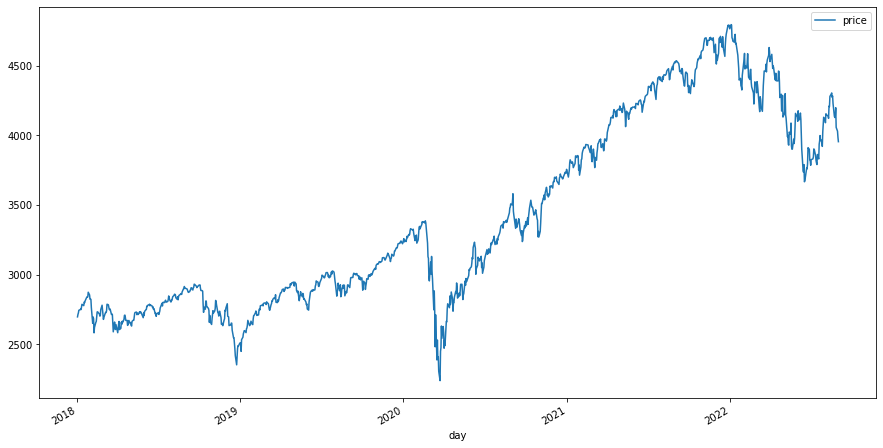

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
SnP.plot(ax=ax)

## ARIMA 모델 가져오기, 사용하기

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(SnP_train.price.values, order = (2,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


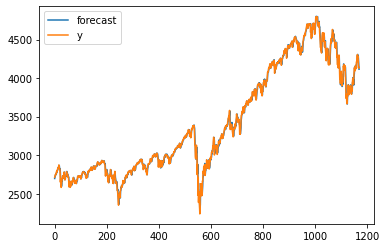

In [ ]:
# 핛습 데이터에 대한 예측 결과
fig = model_fit.plot_predict()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_

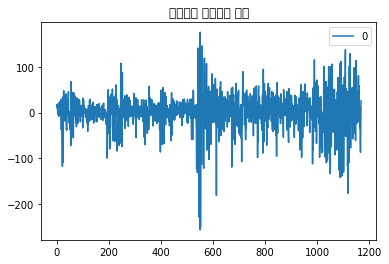

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title = "실제값과 예측값의 잔차")

In [ ]:
forecast_data = model_fit.forecast(steps=5)

# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_arima_y = forecast_data[0].tolist()

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = SnP_test.price.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text

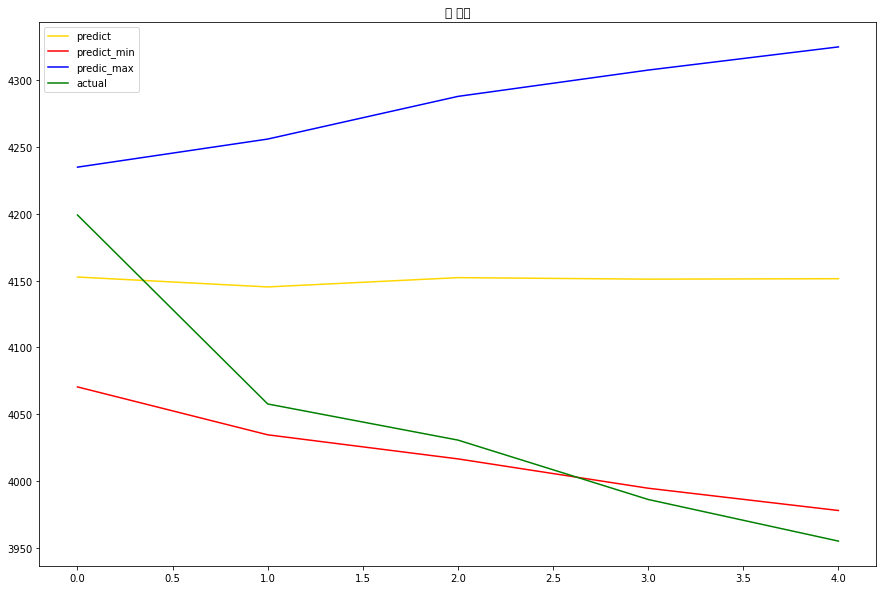

In [ ]:
plt.figure(figsize=(15, 10))

# 모델이 예측한 가격 그래프
plt.plot(pred_arima_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['predict', 'predict_min','predic_max','actual'])
plt.title("값 비교")
plt.show()

## Model 2 : Facebook Prophet 사용하기



In [ ]:
!pip install Prophet

from prophet import Prophet

SnP = SnP.reset_index()

SnP.columns = ['ds', 'y']

SnP_train = SnP[:1170]
SnP_test = SnP[1170:]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

prophet.fit(SnP_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpb2ldfuyg/_v2wlhnf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb2ldfuyg/z2fjper9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77516', 'data', 'file=/tmp/tmpb2ldfuyg/_v2wlhnf.json', 'init=/tmp/tmpb2ldfuyg/z2fjper9.json', 'output', 'file=/tmp/tmpgo2rtibt/prophet_model-20220926113206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:32:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:32:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1170,2022-08-25,4240.190503,4153.593587,4323.407828
1171,2022-08-26,4248.041682,4151.792422,4334.316723
1172,2022-08-27,3683.961269,3590.139070,3772.233342
1173,2022-08-28,3689.452462,3594.578815,3777.765346
1174,2022-08-29,4258.883536,4170.828625,4346.578758


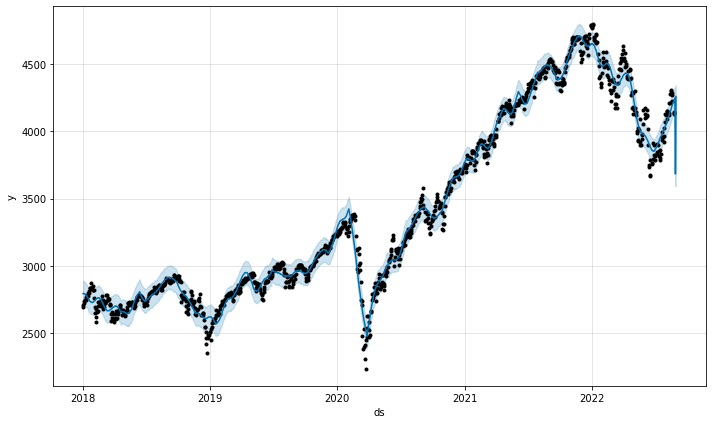

In [ ]:
fig1 = prophet.plot(forecast_data)

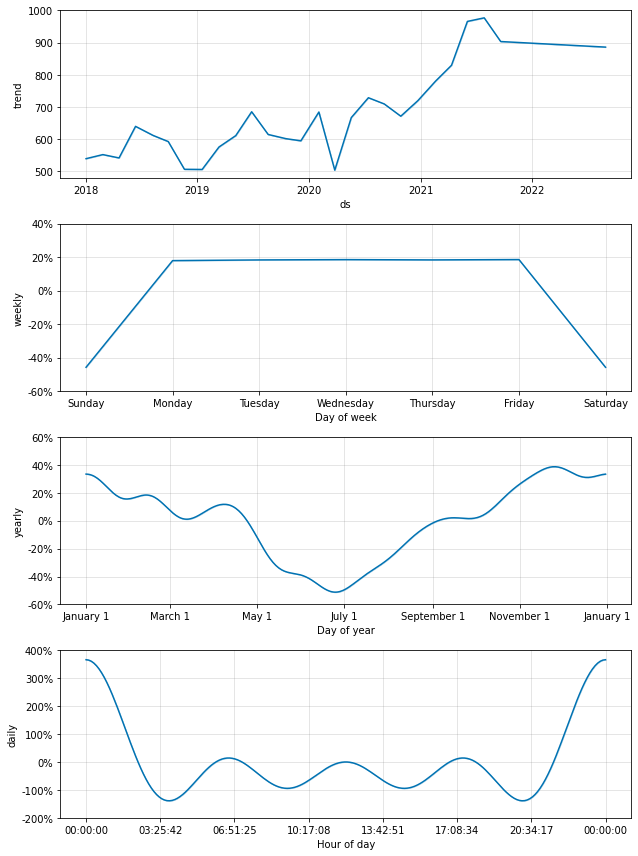

In [ ]:
fig2 = prophet.plot_components(forecast_data)

Text(0.5, 1.0, '값 비교')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text

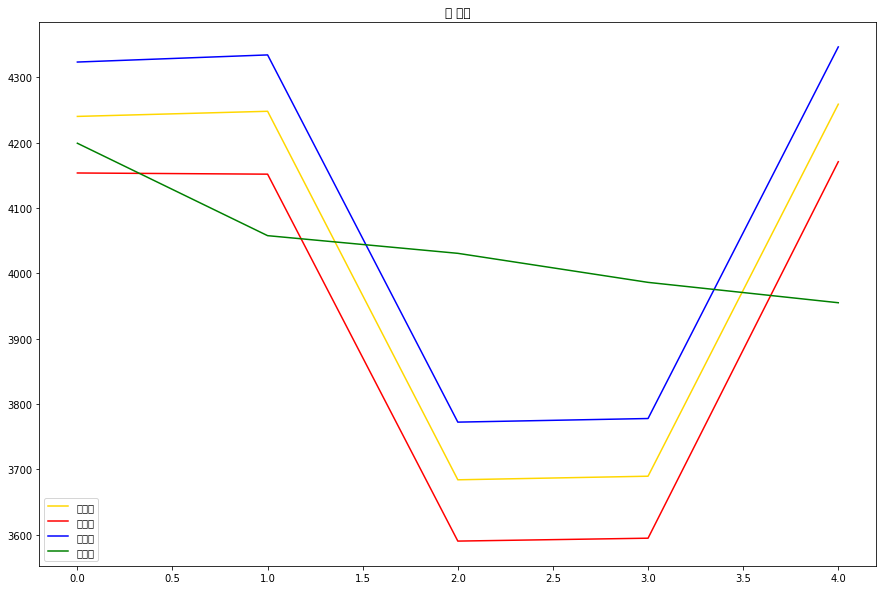

In [ ]:
plt.figure(figsize=(15, 10))

# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_fbprophet_y = forecast_data.yhat.values[-5:]

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = SnP_test.y.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-5:]
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-5:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['Predict', 'Min','Max','Actual'])
plt.title("Value Comparison")

In [ ]:
pred_fbprophet_y_1 = forecast_data.yhat.values[-5:]

## LSTM 사용하기

##RMSE예측값 확인하기


In [ ]:
df = pd.DataFrame({'ARIMA 예측값':pred_arima_y,
                   'FBprophet 예측값':  pred_fbprophet_y,
                   '실제값':test_y})

df

,ARIMA 예측값,FBprophet 예측값,실제값
0,4152.688715,4240.190503,4199.120117
1,4145.274938,4248.041682,4057.659912
2,4152.236305,3683.961269,4030.610107
3,4151.101032,3689.452462,3986.159912
4,4151.440845,4258.883536,3955.000000


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


# arima 모델의  rmse
rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))

print(str(round(rmse_arima,0)))

134.0


Text(0.5, 1.0, 'Value Comparison')

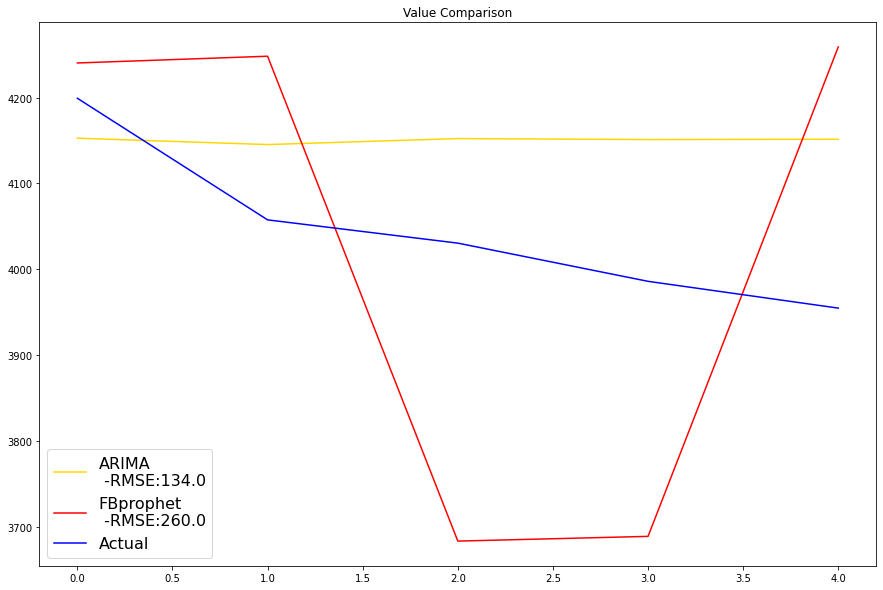

In [ ]:
plt.figure(figsize=(15, 10))

# arima 모델의  rmse
rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))

# fbprophet 모델의  rmse
rmse_fbprophet = sqrt(mean_squared_error(pred_fbprophet_y, test_y))


# 모델이 예측한 가격 그래프
plt.plot(df[['ARIMA 예측값']], color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(df[['FBprophet 예측값']], color = 'red')

# 실제 가격 그래프
plt.plot(test_y, color = 'blue')

plt.rc('legend', fontsize=16)
plt.legend(['ARIMA\n -RMSE:' + str(round(rmse_arima,0)), 
            'FBprophet\n -RMSE:' + str(round(rmse_fbprophet,0)),
            'Actual'])
plt.title("Value Comparison")